用 Python 介绍 Cairo
====================================

Cairo 是用于绘制矢量图形的库。矢量图形之所以有趣，是因为它们在缩放或变换时不会失去清晰度。

Pycairo 是 Cairo 的一组绑定。它提供了 cairo 模块，可以用来从 Python 调用 Cairo 命令。


理解如何使用 Cairo
------------------------------

理解如何使用 Cairo 的最佳方法是将你自己想象成艺术家，使用画笔在画布上绘制形状。

首先，你可以选择画笔的几个特性。你可以选择画笔的粗细和你想要使用的颜色。你还可以选择画笔尖的形状——你可以选择圆形或方形。

一旦你选择了画笔，你就可以开始绘画了。在描述你想要绘制的内容时，你需要非常精确。

首先，决定你希望将画笔放在画布的哪个位置。你可以通过提供x和y坐标来实现这一点。接下来，你定义你希望画笔的笔触看起来是什么样子——弧形、直线等。最后，你定义你希望笔触结束的位置，同样通过提供x和y坐标。绘制三角形和正方形非常简单！

更复杂的图形是通过上述主题的变体生成的，并添加了一些额外的功能，如填充（着色）、变换（缩放、移动）等。使用Python接口来使用Cairo。

几乎所有的工作都围绕着使用: {class}`cairo.Context`（在 Cairo 的 C API 中称为 ``cairo_t``）。这是你发送绘图命令的对象。有几种不同的方式可以初始化这个对象。

初始化 {class}`cairo.Context` 对象
-------------------------------------

* 非常重要的事情是，你需要意识到你描述图形时使用的坐标和你将要显示图形时使用的坐标之间是有区别的。

  （例如——在演示时，你先在透明胶片上绘制，然后在投影仪上显示——Cairo称透明胶片为用户空间坐标，称投影图像为设备空间坐标）

  在初始化Cairo上下文对象时，我们告诉它如何将我们的描述转换为应该如何显示。为此，我们提供了一个变换矩阵。修改变换矩阵可以导致一些非常有趣的结果。

* Cairo最强大的功能之一是它可以以多种不同的格式输出图形（它可以使用多个后端）。对于打印，我们可以让Cairo将我们的图形转换为Postscript并发送到打印机。对于屏幕显示，我们可以让Cairo将我们的图形转换为glitz可以理解的格式，以实现硬件加速渲染！它还有许多其他重要且有用的目标后端。在初始化:class:`cairo.Context`时，我们设置它的目标后端，并提供一些细节（如颜色深度和大小），如下例所示。

示例

In [2]:
from pathlib import Path
temp_dir = Path(".temp/")
temp_dir.mkdir(exist_ok=True)

In [3]:
import math
import cairo

WIDTH, HEIGHT = 256, 256

surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context(surface)

ctx.scale(WIDTH, HEIGHT)  # 规范化画布

pat = cairo.LinearGradient(0.0, 0.0, 0.0, 1.0)
pat.add_color_stop_rgba(1, 0.7, 0, 0, 0.5)  # 第一个停止点，50%不透明度
pat.add_color_stop_rgba(0, 0.9, 0.7, 0.2, 1)  # 最后一个停止点，100%不透明度

ctx.rectangle(0, 0, 1, 1)  # 矩形(x0, y0, x1, y1)
ctx.set_source(pat)
ctx.fill()

ctx.translate(0.1, 0.1)  # 改变当前的变换矩阵

ctx.move_to(0, 0)
# 弧形(cx, cy, radius, start_angle, stop_angle)
ctx.arc(0.2, 0.1, 0.1, -math.pi / 2, 0)
ctx.line_to(0.5, 0.1)  # 直线到(x,y)
# 曲线(x1, y1, x2, y2, x3, y3)
ctx.curve_to(0.5, 0.2, 0.5, 0.4, 0.2, 0.8)
ctx.close_path()

ctx.set_source_rgb(0.3, 0.2, 0.5)  # 纯色
ctx.set_line_width(0.02)
ctx.stroke()

surface.write_to_png(f"{temp_dir}/example.png")  # 输出到PNG文件

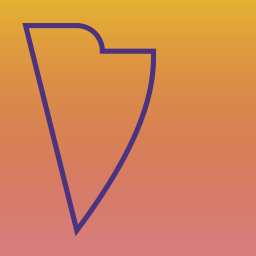

In [5]:
from IPython import display
display.Image(f"{temp_dir}/example.png")

## 查找 cairo 动态库

In [2]:
def get_include_path():
    import os
    from importlib.util import find_spec
    spec = find_spec("cairo")
    assert spec is not None
    return os.path.join(os.path.dirname(spec.origin), 'include')

In [3]:
get_include_path()

'/media/pc/data/lxw/envs/anaconda3a/envs/ai/lib/python3.12/site-packages/cairo/include'